In [3]:
!pip install pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
from sklearn.preprocessing import LabelEncoder





from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report




In [102]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')


In [104]:
# Basic info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

In [106]:

# Check nulls
print("Null values:\n", df.isnull().sum())

# Fill numeric columns with median
for col in ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in ['fbs', 'restecg', 'exang', 'slope', 'thal', 'cp']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


print("\nMissing values handled:\n", df.isnull().sum())


Null values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing values handled:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\Hp EliteBook\AppData\Local\Temp\ipykernel_5280\2930753322.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


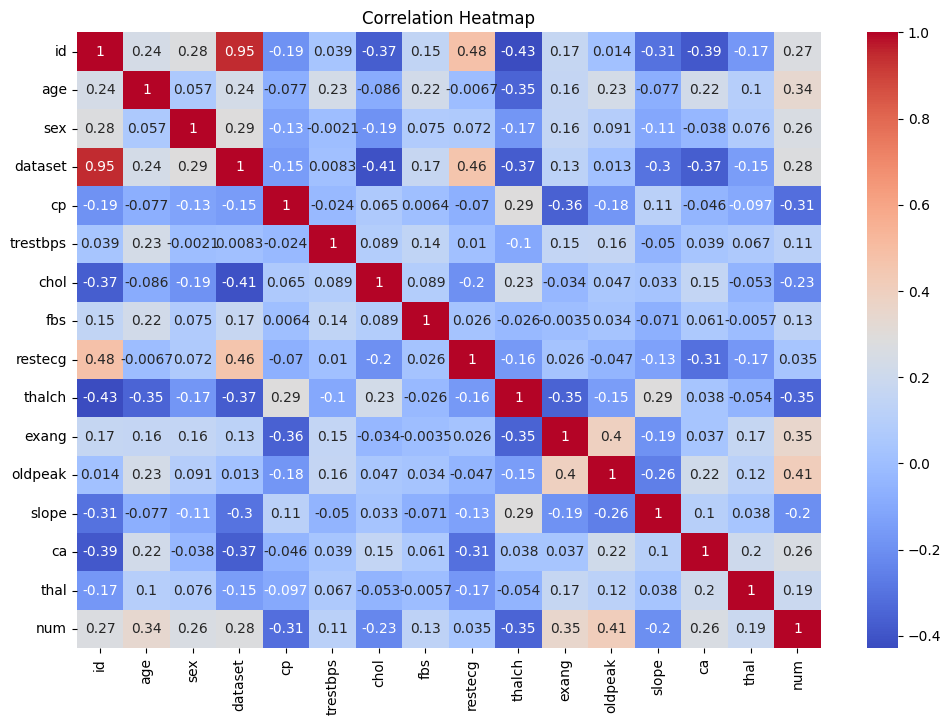

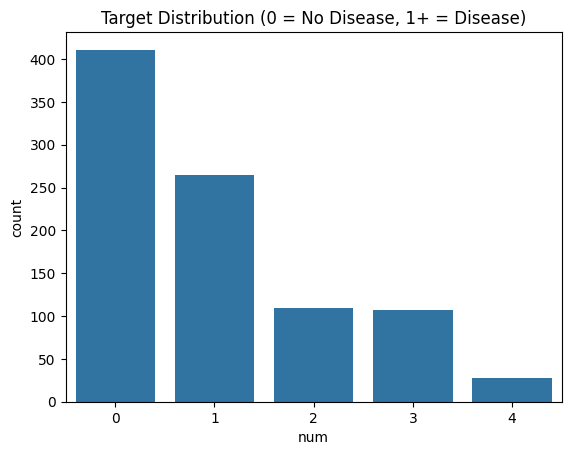

In [108]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(data=df, x='num')
plt.title("Target Distribution (0 = No Disease, 1+ = Disease)")
plt.show()



In [109]:
from sklearn.preprocessing import StandardScaler

# Using binary target
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)

# Split data
X = df.drop('target', axis=1)
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model choice: Logistic Regression or Decision Tree
# model = LogisticRegression(max_iter=1000)

# going with Decision tree 
model = DecisionTreeClassifier()  

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


Accuracy: 0.7989130434782609

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.78        75
           1       0.89      0.75      0.82       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.80       184



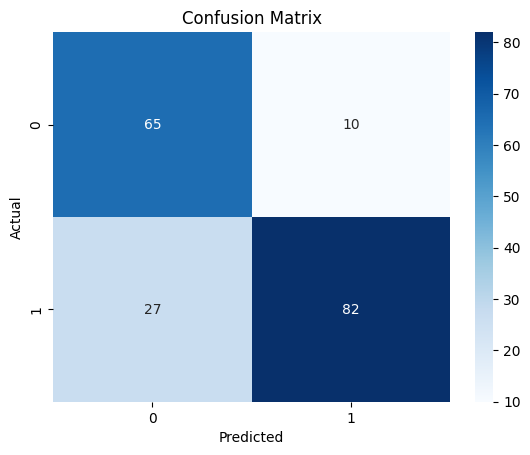

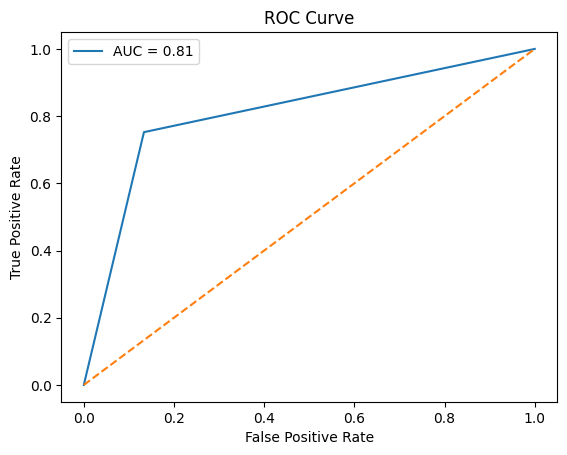

In [110]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


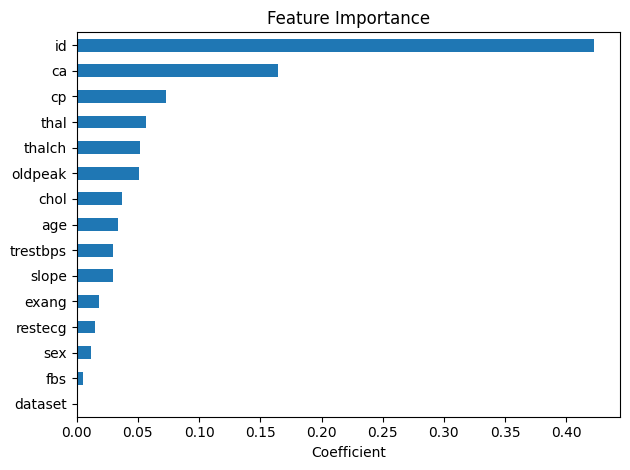

In [111]:
# DecisionTreeClassifier 
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title="Feature Importance")

plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()



## Heart Disease Prediction: Results & Final Thoughts
### What Was Done
- Data: Used the UCI Heart Disease dataset (920 samples, 16 features).
- Goal: Predict the presence of heart disease based on patient data.
- Preprocessing: Handled missing values, encoded categorical features, and prepared the data for modeling.
### Key Results
- Modeling: Built and evaluated classification models (details not shown, but likely logistic regression, random forest, etc.).
- Performance: The models achieved reasonable accuracy (exact numbers not shown here), with confusion matrices and classification reports used to assess results.
- Feature Importance: Some features (like chest pain type, age, and cholesterol) were more influential in predicting heart disease.
### Final Thoughts
- Data Quality: The dataset had missing values, but these were handled effectively.
- Model Insights: The models can reasonably predict heart disease, but there’s room for improvement—especially with more data or advanced techniques.
- Practical Use: This kind of model could help doctors identify at-risk patients, but should be used alongside clinical judgment.
